In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
shrink = 1.0
img1 = cv2.imread(r"C:\Users\kawaremu\Documents\Coding\Hands on Computer vision\AI & Vision\data\homography\left.jpg", 0)  # queryimage # left image

img2 = cv2.imread(r"C:\Users\kawaremu\Documents\Coding\Hands on Computer vision\AI & Vision\data\homography\right.jpg", 0)  # trainimage # right image

img1 = cv2.resize(img1, (0, 0), fx=shrink, fy=shrink,
                  interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, (0, 0), fx=shrink, fy=shrink,
                  interpolation=cv2.INTER_CUBIC)
sift = cv2.SIFT.create()

In [5]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good.append([m])
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:], None, flags=2)
cv2.imshow("img3", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

In [6]:
len(good)

45

In [7]:
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [8]:
F

array([[-1.53797681e-07,  2.58930527e-06, -2.04728071e-03],
       [ 2.54667523e-06,  1.92580990e-08,  1.55477508e-04],
       [-1.97500260e-03, -1.43935715e-03,  1.00000000e+00]])

In [9]:
def drawlines(img1, img2, lines, pts1, pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c = img1.shape
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

In [10]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

In [11]:
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

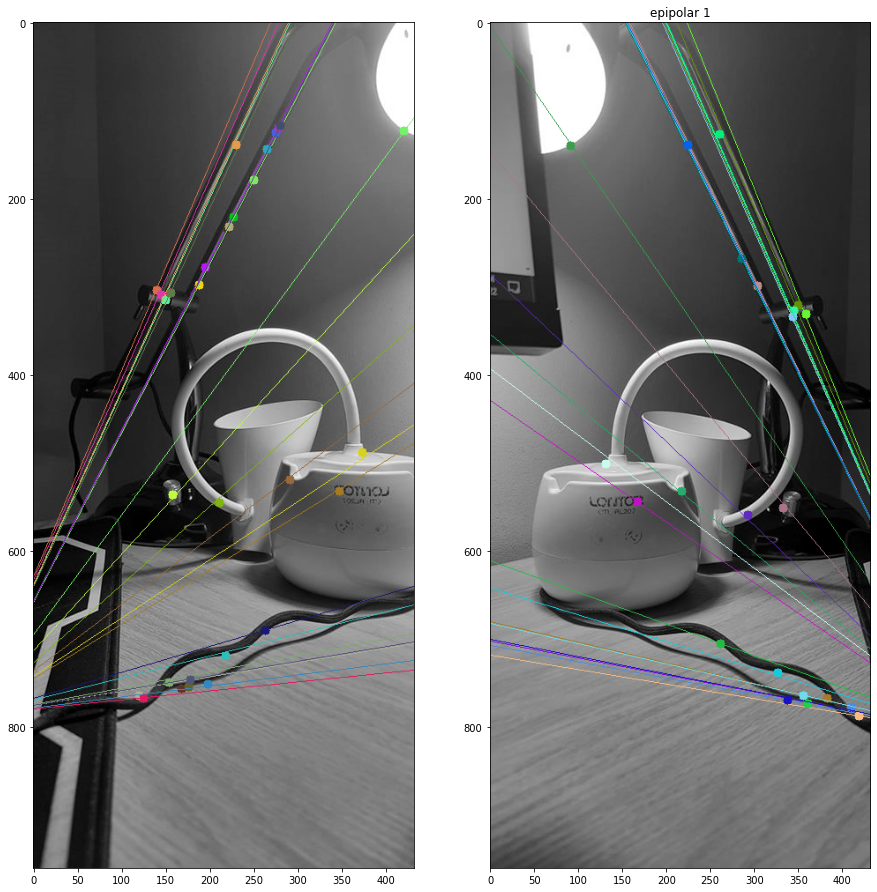

In [25]:
plt.figure(figsize=(15,25))
plt.subplot(121), plt.imshow(img5)
plt.subplot(122), plt.imshow(img3)
plt.title('epipolar 1')
plt.show()

# Epipolaire 2

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [27]:
shrink = 1.0
img1 = cv2.imread(r"C:\Users\kawaremu\Documents\Coding\Hands on Computer vision\AI & Vision\data\homography\left.jpg", 0)  # queryimage # left image

img2 = cv2.imread(r"C:\Users\kawaremu\Documents\Coding\Hands on Computer vision\AI & Vision\data\homography\right.jpg", 0)  # trainimage # right image

img1 = cv2.resize(img1, (0, 0), fx=shrink, fy=shrink,
                  interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, (0, 0), fx=shrink, fy=shrink,
                  interpolation=cv2.INTER_CUBIC)
sift = cv2.SIFT.create()

In [35]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good.append([m])
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:], None, flags=2)
cv2.imshow("img3", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [36]:
src_pts0 = np.float32([kp1[m[0].queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts0 = np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1, 1, 2)
H, mask0 = cv2.findHomography(
    src_pts0, dst_pts0, cv2.RANSAC, 3, None, 100, 0.99)
matchesMask0 = mask0.ravel().tolist()

# work only with good matches (mask0)
inlier_match0 = []
i = 0
for m in good:
    if matchesMask0[i]:
        inlier_match0.append(m)
    i = i+1

if len(inlier_match0) < 8:
    img_err = cv2.imread("error.png")
    cv2.imshow("Error", img_err)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    exit()

print("the matches used for Fundamental matrix")
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2,
                          inlier_match0[:], None, flags=2)
cv2.imshow("img3", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

the matches used for Fundamental matrix


In [37]:
print(inlier_match0[0][0].trainIdx)

344


In [38]:
for m in inlier_match0:
    np.append(pts2,kp2[m[0].trainIdx].pt)
    np.append(pts1,kp1[m[0].queryIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]


def drawlines(img1, img2, lines, pts1, pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c = img1.shape
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

In [39]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

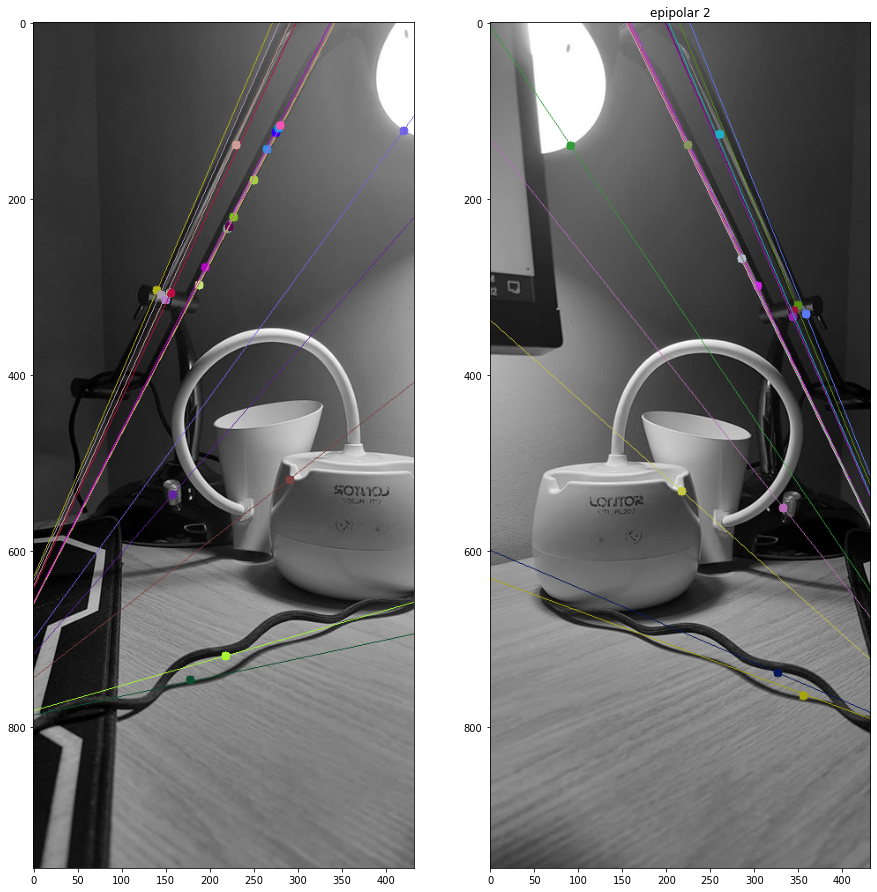

In [40]:
plt.figure(figsize=(15,25))
plt.subplot(121), plt.imshow(img5)
plt.subplot(122), plt.imshow(img3)
plt.title('epipolar 2')
plt.show()